# Проект урока 3. Продвинутые расчеты и визуализация
#  «Аналитика клиентов и логов gamedev-стартапа»

## Шаг 1

В этом проекте вы будете работать в роли аналитика gamedev-стартапа, который вывел на рынок простую игру: в приложении пользователь пытается угадать ответы на предлагаемые вопросы. Набор данных состоит из двух датасетов: user_data и logs.

**Описание данных:**

user_data:

- client – идентификатор пользователя  
- premium – есть ли у клиента премиум статус  
- age – возраст  

logs:

- client – идентификатор пользователя  
- success – результат ответа (операции): успех - 1, нет - 0  
- platform – платформа  
- time – время в формате Unix

Вы можете решать задания тем способом, который считаете наиболее удобным или оптимальным. А для того, чтобы лучше понять задание, следуйте по шагам выполнения. Бывает, что их можно выполнить в одну строчку, применяя методы друг за другом. А если выполняете шаги отдельно, не забудьте сохранить результат в переменную и в следующем шаге работать именно с ней.

В ноутбуке место для вашего решения обозначено комментарием `# Ваш код здесь`, но вы можете писать код где вам удобно, добавлять или удалять ячейки с кодом или текстом по вашему усмотрению.

Кроме того можно посмотреть подсказки, кликнув на строчку `► Нажмите сюда, чтобы увидеть подсказку`. Также не забывайте о наличии конспектов и возможности задать вопрос в Discord, ссылка на нужный тред есть на странице каждого шага в LMS

## Шаг 2

Начните с того, что загрузите данные и исследуйте основную информацию о них. **Проверьте, сколько пустых значений в датафрейме `user_data`.**

Шаги выполнения:

1. Импортируйте библиотеку pandas

2. Загрузите два csv файла к уроку в свою папку в JupyterНub
3. Прочитайте эти датасеты, результаты сохранив в соответствующие переменные `user_data` и `logs`

4. Узнайте основную информацию о данных: посмотрите на содержимое датафреймов, проверьте размер каждой загруженной таблицы, ознакомьтесь с типами данных, взгляните на описательную статистику по колонкам

5. Определите, сколько пустых значений в датафрейме `user_data`

In [1]:
import pandas as pd
user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv')

In [3]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [2]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [4]:
user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

## Шаг 3

Ваш стартап планирует выбрать амбассадоров продукта, чтобы через них продвигать игру. Для этого менеджер хочет встретиться с наиболее активными клиентами, которые дают больше других верных ответов. А ваша задача — выявить таких клиентов.

**Определите, какой клиент или клиенты дали наибольшее количество успешных ответов. Перечислите их идентификаторы (см.колонку `client`) через запятую и пробел в порядке возрастания**. Например:

`12, 123, 456`

Шаги выполнения:
1. Отберите из данных только те ответы, которые были успешными. Это значит, что вам надо найти все строки, где значение в столбце `success` датафрейма `logs` равно `True`

2. Подсчитайте количество успешных ответов для каждого клиента

3. Определите максимальное число успешных ответов в этих данных

4. Оставьте только записи о том клиенте или тех клиентах, которые дали максимальное число успешных ответов

5. Получите идентификатор(ы) такого клиента / таких клиентов. Если их несколько — отсортируйте идентификаторы по возрастанию. Скопируйте получившийся результат, без скобок

In [23]:
logs.query('success')\
    .groupby('client', as_index=False)\
    .success.count()\
    .sort_values('success', ascending=False).head(9)\
    .sort_values('client').client.values

array([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584],
      dtype=int64)

## Шаг 4

Команда стартапа хочет развивать свою игру, но имеет ограниченные ресурсы, поэтому решила определиться, с какой платформы стоит начать. **Выясните, с какой платформы было дано наибольшее количество успешных ответов**

Шаги выполнения:
1. Как и в предыдущем задании, отберите из данных только те ответы, которые были успешными

2. Подсчитайте количество успешных ответов с каждой платформы

3. Определите платформу с наибольшим количеством успешных ответов

<AxesSubplot:xlabel='platform'>

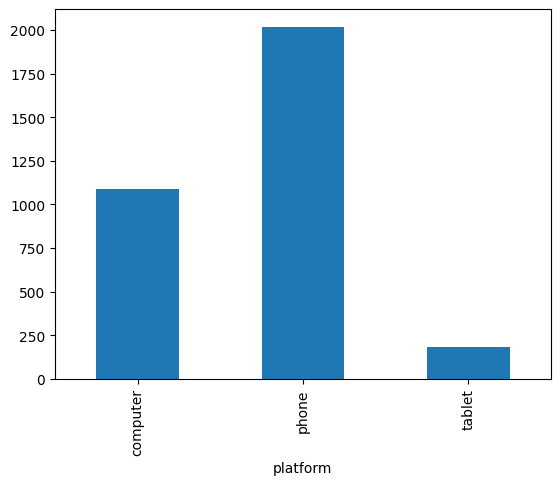

In [31]:
logs.query('success')\
    .groupby('platform')\
    .client.count().plot(kind='bar')

## Шаг 5

Менеджер продукта выдвинул идею, что стоит сфокусироваться не просто на одной платформе, но ещё и только на сегменте премиум. **Определите, какая платформа пользуется наибольшей популярностью среди премиум-клиентов**.

Шаги выполнения:
1. Объедините датафреймы `user_data` и `logs` по колонке `client`, чтобы собрать вместе информацию о статусе клиента и его активности в приложении

2. Посмотрите на первые строки получившегося датафрейма, чтобы убедиться, что объединение прошло корректно

3. Отберите из данных только записи о премиум-клиентах

4. Подсчитайте количество ответов премиум-клиентов с каждой платформы

5. Определите платформу с наибольшим количеством ответов премиум-клиентов

<AxesSubplot:xlabel='platform'>

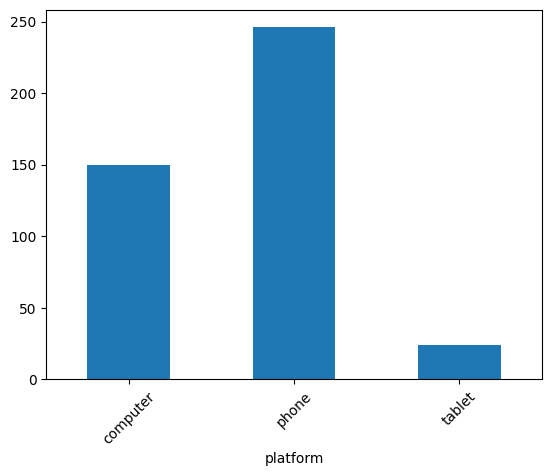

In [41]:
user_data.merge(logs, on='client', how='inner')\
    .query('premium').groupby('platform')\
    .client.count().plot(kind='bar', rot='45')

## Шаг 6

Самую популярную платформу среди премиум-клиентов определили, но менеджер хочет посмотреть, насколько она более востребованная, чем остальные платформы. Сравнивать числа удобнее не в таблице, а на графике. **С помощью модуля `pyplot` библиотеки `matplotlib` постройте график, демонстрирующий количество ответов премиум-клиентов на каждой платформе**. Выберите наиболее похожий график на тот, что получился у вас.  
*Если на графике не видны значения на осях, используйте светлую тему в JupyterHub или посмотрите графики на LMS*

A
![A](https://storage.yandexcloud.net/klms-public/production/learning-content/455/4133/35503/98839/469654/A.png)

B
![B](https://storage.yandexcloud.net/klms-public/production/learning-content/455/4133/35503/98839/469654/B.png)

C
![C](https://storage.yandexcloud.net/klms-public/production/learning-content/455/4133/35503/98839/469654/C.png)

Шаги выполнения:
1. Как и в прошлом шаге, отберите из данных только записи о премиум-клиентах и подсчитайте количество их ответов для каждой платформы

2. Импортируйте модуль `pyplot` из библиотеки `matplotlib` с общепринятым алиасом `plt`

3. Постройте горизонтальный барплот (столбчатую диаграмму), где по оси y будут названия платформ, а по оси x - количество ответов

4. Выберите наиболее похожий график на тот, что получился у вас

In [55]:
df = user_data\
        .merge(logs, on='client', how='inner')\
        .query('premium').groupby('platform')\
        .client.count()
df

platform
computer    150
phone       246
tablet       24
Name: client, dtype: int64

In [56]:
import matplotlib.pyplot as plt

<BarContainer object of 3 artists>

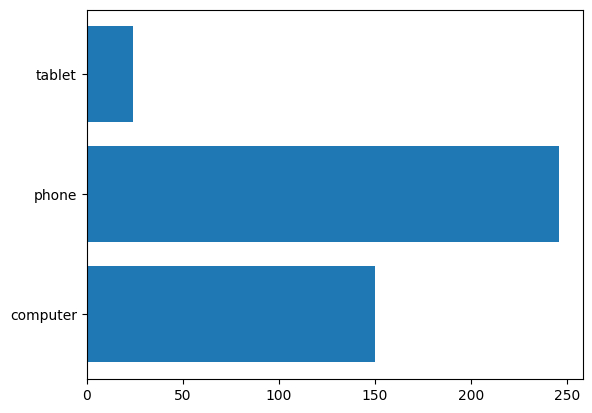

In [60]:
plt.barh(df.index, df.values)

## Шаг 7

Продожим раскручивать идею о том, что нашей команде стоит сфокусироваться на работе именно с премиум-клиентами. Посмотрите на долю неуспешных ответов от всего количества ответов — отдельно у премиум и обычных клиентов. **У какой категории клиентов доля неуспешных ответов выше?**

Варианты ответа:
- премиум  
- обычные

Шаги выполнения:
1. Сгруппируйте объединенный датафрейм, полученный на прошлом шаге, по категории клиентов (см.колонку `premium`) и успешности ответа (см.колонку `success`), затем посчитайте количество записей для каждой группы

2. Преобразуйте форму агрегированного датафрейма так, чтобы в строках была категория клиента (премиум или нет), в колонках успешность результата (да или нет), а в значениях — количество записей для каждой группы

3. Создайте новую колонку с долей неуспешных ответов от всего количества ответов. Для этого разделите колонку с числом неуспешных ответов на сумму значений из колонок с числом успешных и неуспешных ответов

4. Посмотрите на новую колонку: у какой категории клиентов (премиум или обычных) доля неуспешных ответов выше, т.е. в какой строке значение больше?

In [61]:
user_data\
        .merge(logs, on='client', how='inner')

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [65]:
 df = user_data\
        .merge(logs, on='client', how='inner')\
        .groupby(['premium', 'success'], as_index=False)\
        .platform.count().pivot(values='platform', columns='success', index='premium')
df

success,False,True
premium,,
False,775,2244
True,117,303


In [68]:
df['new_col'] = df[False] / (df[False] + df[True])
df

success,False,True,new_col
premium,,,
False,775,2244,0.256708
True,117,303,0.278571


## Шаг 8

У команды всё ещё есть сомнения по поводу работы только с премиум-клиентами. Посмотрим, как возраст премиум-клиентов отличается от возраста обычных. **Для сравнения распределения возраста у премиум и обычных клиентов постройте две гистограммы в одном пространстве, используя функцию `plt.subplot()` из библиотеки `matplotlib`**. В обоих графиках по оси х должен идти возраст, а по оси у - количество клиентов с таким возрастом.

Выберите верные утверждения:  
- премиум-клиентов возраста примерно 35-39 лет больше, чем обычных клиентов этого же возраста
- премиум-клиентов возраста примерно 35-39 лет меньше, чем обычных клиентов этого же возраста
- у премиум-клиентов в каждую категорию возраста (столбец) попадает абсолютно одинаковое количество клиентов
- у обычных клиентов в каждую категорию возраста (столбец) попадает абсолютно одинаковое количество клиентов
- среди премиум-клиентов больше тех, кому примерно 25-30 лет, чем тех, кому примерно 20-25 лет
- среди премиум-клиентов меньше тех, кому примерно 25-30 лет, чем тех, кому примерно 20-25 лет
- у нас чуть больше 40 премиум-клиентов возраста ориентировочно 65-69 лет
- у нас около 400 премиум-клиентов возраста ориентировочно 65-69 лет

Шаги выполнения:
1. Используя функции `plt.subplot()` и `plt.hist()`, постройте два графика, один над другим. Первый должен показывать распределение возраста только премиум-клиентов, а второй - только обычных клиентов

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Чтобы добавить заголовок,** передайте в функцию `plt.title()` строку с названием графика. Так как у нас два графика, один под другим, то вы можете добавить заголовок только к верхнему графику.
      
**Чтобы добавить подписи осей,** передайте в функцию `plt.ylabel()` строку с названием оси у, а в функцию `plt.xlabel()` строку с названием оси х. В подпись оси у стоит написать категорию клиентов (премиум или обычные), а оси х - переменную, по которой строится распределение (возраст). Так как у нас два графика, один под другим, то вы можете добавить подпись оси х только к нижнему графику.
      
**Чтобы добавить сетку,** передайте в функцию `plt.grid()` значение `True`
      
**Куда писать эти функции?** Под каждой функцией визуализации, на отдельной строчке, но в той же ячейке
</p>
</details>

3. Посмотрите на получившийся график и выберите верные утверждения

In [70]:
full_df = user_data.merge(logs, on='client', how='inner')

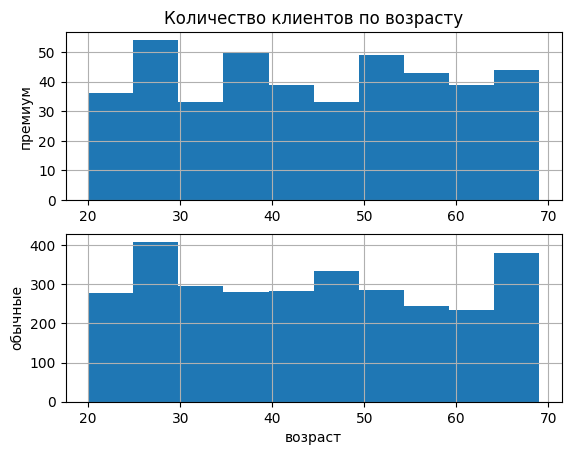

In [73]:
plt.subplot(2, 1, 1)
# построение графика
plt.hist(full_df.query('premium').age)
# заголовок
plt.title("Количество клиентов по возрасту") 
# ось ординат
plt.ylabel("премиум") 
plt.grid(True)           

plt.subplot(2, 1, 2)
# построение графика
plt.hist(full_df.query('premium == False').age)
# ось абсцисс
plt.xlabel("возраст")  
# ось ординат
plt.ylabel("обычные") 
plt.grid(True)    

## Шаг 9

Посмотрев на аналитику по премиум-клиентам, команда стартапа решила всё-таки работать со всеми категориями клиентов и в первую очередь обратить внимание на число успешных и неуспешных ответов. Так ваша работа повлияла на работу всей команды. Но не время останавливаться!

**Постройте график, отражающий распределение количества успешных ответов на пользователя.** По оси `x` должно идти число успешных ответов, а по оси `y` - сколько пользователей дали такое число успешных ответов

**Выберите одно или несколько верных утверждений**

Шаги выполнения:
1. Как и в задании из Шага 3, отберите из данных только те ответы, которые были успешными. Это значит, что вам надо найти все строки, где значение в столбце `success` датафрейма `logs` равно `True`

2. Подсчитайте количество успешных ответов для каждого клиента

3. Чтобы не запутаться в значениях, переименуйте получившуюся серию - сейчас колонка в ней называется `client`, хотя в ней число успешных ответов

4. Импортируйте библиотеку `seaborn` с общепринятым алиасом (псевдонимом) `sns`

5. На основе получившейся серии постройте график, отражающий распределение количества успешных ответов на пользователя. Чтобы по оси x шло число успешных ответов, а по оси y - сколько пользователей дали такое число успешных ответов, используйте функцию `countplot()` из библиотеки `seaborn`

In [102]:
df = full_df.query('success')\
    .client.value_counts().rename('success').reset_index()
df

,index,success
0,36165,41
1,78349,41
2,12179,41
3,52870,41
4,82563,41
...,...,...
2099,86663,1
2100,80520,1
2101,53228,1
2102,84618,1


In [103]:
import seaborn as sns

<AxesSubplot:xlabel='success', ylabel='count'>

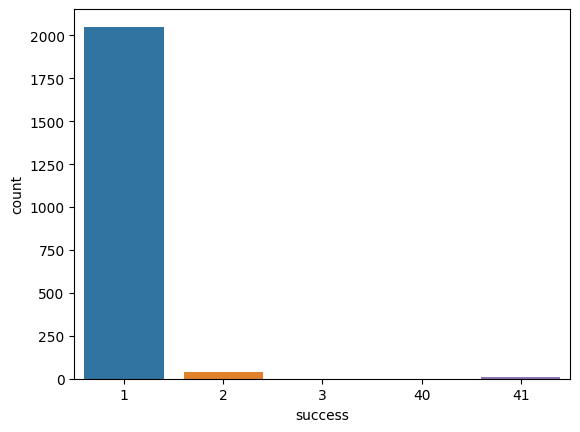

In [106]:
sns.countplot(df, x='success')

## Шаг 10

Копнем глубже и узнаем, **клиенты какого возраста дали наибольшее количество успешных ответов на компьютере?** Визуализируйте число успешных ответов, сделанных на платформе `computer`, в зависимости от возраста. По оси `x` будет идти возраст, по оси `y` – число успешных ответов.

Если из-за размера график получается нечитаемым, можно добавить `plt.figure(figsize=(12, 8))` в начало соответствующей ячейки c кодом построения визуализации

Шаги выполнения:
1. Оставьте только записи об успешных ответах (см.колонку `success`) с платформы компьютер (см.колонку `platform`)

2. С помощью функции `sns.countplot()` постройте график числа успешных ответов в зависимости от возраста. По оси `x` будет идти возраст, по оси `y` – число успешных ответов.

3. Определите, клиенты какого возраста дали наибольшее количество успешных ответов на компьютере. Для этого найдите значение на оси х для самого высокого столбца на графике. Чтобы можно было прочитать график, добавьте строку кода `plt.figure(figsize=(12, 8))` в начало ячейки c кодом построения графика

In [108]:
df = full_df.query('success & platform=="computer"')
df

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108
...,...,...,...,...,...,...
3414,93718,False,63,True,computer,1585466349
3415,13688,True,66,True,computer,1585453923
3417,68348,False,69,True,computer,1585456739
3427,9450,False,34,True,computer,1585446079


<AxesSubplot:xlabel='age', ylabel='count'>

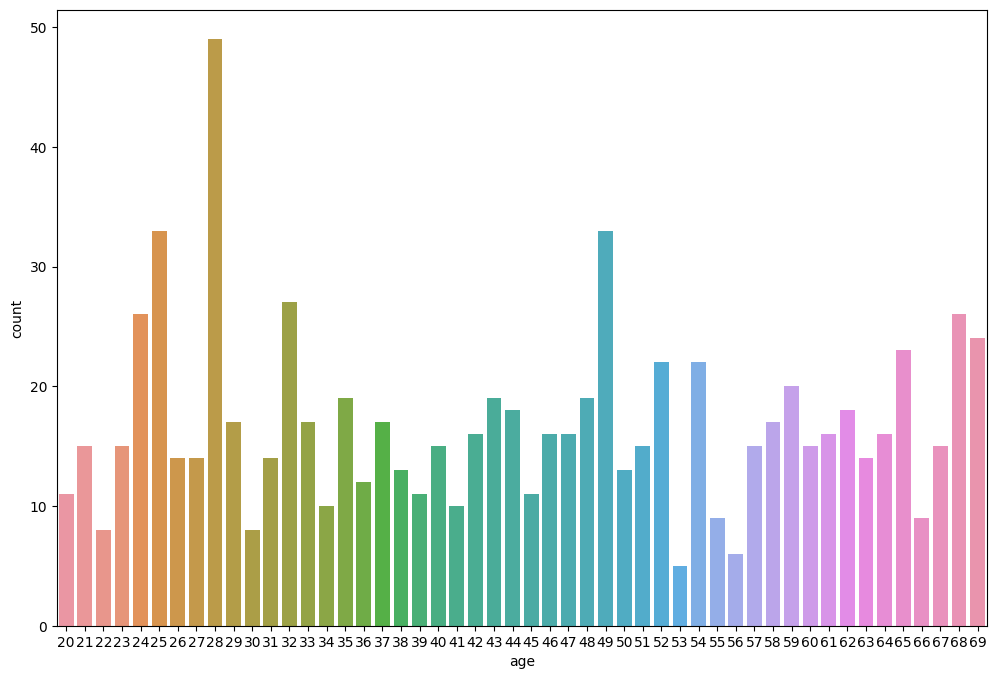

In [109]:
plt.figure(figsize=(12, 8))
sns.countplot(df, x='age')



## Итоги

Итак, вы собрали ту аналитику, которая на данном этапе требовалась команде геймдев-стартапа для принятия решения о векторе развития продукта. В процессе вы отработали навыки объединения данных и изменения их формы, а также построения графиков и принятия решений на основе визуализации.